In [34]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from collections import Counter

In [35]:
# Search for the best K
def search_k(X_train, T_train, X_test, T_test, klist=[]):
    max_accu = 0
    best_k = 0
    for k in klist:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, T_train)
        pred = knn.predict(X_test)
        accu = metrics.accuracy_score(T_test, pred)
        if accu > max_accu:
            max_accu = accu
            best_k = k
    return best_k, max_accu

In [45]:
# Test each K value
def test_k(X_train, T_train, X_test, T_test, klist=[]):
    train_accu = []
    test_accu = []
    for k in klist:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, T_train)
        test_accu.append(knn.score(X_test, T_test))
        train_accu.append(knn.score(X_train, T_train))
    return train_accu, test_accu

In [48]:
# Plot train and test accuracy for different k values
def plot_k(train_accu, test_accu, klist):
    plt.plot(klist, train_accu, label = "train accuracy")
    plt.plot(klist, test_accu, label = "test accuracy")
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [36]:
# Load dataset from csv file
CSV_FILE = '../scripts/features-0.csv'
allrows = np.loadtxt(CSV_FILE, delimiter=',', dtype='str')
allrows.shape

(574, 135)

In [37]:
cols = allrows.shape[1] - 1
X = allrows[:, :cols].astype('float')
T = allrows[:, cols]

In [38]:
# Split training and testing set
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=111)

In [53]:
klist=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
search_k(X_train, T_train, X_test, T_test, klist=klist)

(3, 0.8260869565217391)

In [54]:
train_accu, test_accu = test_k(X_train, T_train, X_test, T_test, klist=klist)

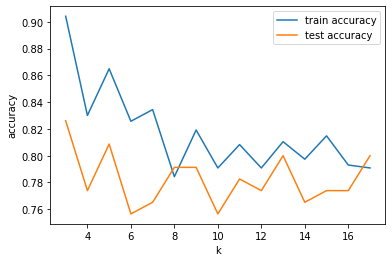

In [55]:
plot_k(train_accu, test_accu, klist)

In [56]:
# KNN on original feature vectors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, T_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
pred = knn.predict(X_test)
metrics.accuracy_score(T_test, pred)

0.8260869565217391

In [58]:
pred_train = knn.predict(X_train)
metrics.accuracy_score(T_train, pred_train)

0.9041394335511983

In [59]:
Counter(zip(pred, T_test))

Counter({('sad', 'sad'): 29,
         ('happy', 'happy'): 37,
         ('neutral', 'sad'): 11,
         ('sad', 'neutral'): 5,
         ('neutral', 'neutral'): 29,
         ('neutral', 'happy'): 1,
         ('happy', 'neutral'): 2,
         ('sad', 'happy'): 1})